In [38]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf


#I have selected Amazon daily stock prices. Download from the link "https://finance.yahoo.com/quote/AMZN/history?p=AMZN".

In [39]:
# Step 2: Load the data
df = pd.read_csv("AMZN.csv")
close_data = df['Close'].values.reshape(-1, 1)

In [40]:
# Step 3: Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
close_data = scaler.fit_transform(close_data)

In [41]:
# Step 4: Create input/output sequences
def create_sequences(data, window_size):
    X = []
    y = []
    for i in range(window_size, len(data)):
        X.append(data[i-window_size:i, 0])
        y.append(data[i, 0])
    X = np.array(X)
    y = np.array(y)
    return X, y

X, y = create_sequences(close_data, 9)

In [42]:
# Step 5: Split the data into training and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [43]:
# Step 6: Reshape the input data
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [44]:
# Step 7: Build the models
rnn_model = tf.keras.models.Sequential([
    tf.keras.layers.SimpleRNN(64, input_shape=(9, 1)),
    tf.keras.layers.Dense(1)
])

lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(64, input_shape=(9, 1)),
    tf.keras.layers.Dense(1)
])

gru_model = tf.keras.models.Sequential([
    tf.keras.layers.GRU(64, input_shape=(9, 1)),
    tf.keras.layers.Dense(1)
])

conv1d_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(9, 1)),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1)
])

for model in [rnn_model, lstm_model, gru_model, conv1d_model]:
    model.compile(loss='mean_squared_error', optimizer='adam')


In [45]:
# Step 8: Train the models
for model in [rnn_model, lstm_model, gru_model, conv1d_model]:
    model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)


In [46]:
# Step 9: Generate predictions
rnn_predictions = rnn_model.predict(X_test)
lstm_predictions = lstm_model.predict(X_test)
gru_predictions = gru_model.predict(X_test)
conv1d_predictions = conv1d_model.predict(X_test)

2/2 [==============================] - 0s 8ms/step


2/2 [==============================] - 0s 5ms/step


In [47]:
# Step 10: Invert the normalization

rnn_predictions = scaler.inverse_transform(rnn_predictions)
lstm_predictions = scaler.inverse_transform(lstm_predictions)
gru_predictions = scaler.inverse_transform(gru_predictions)
conv1d_predictions = scaler.inverse_transform(conv1d_predictions)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

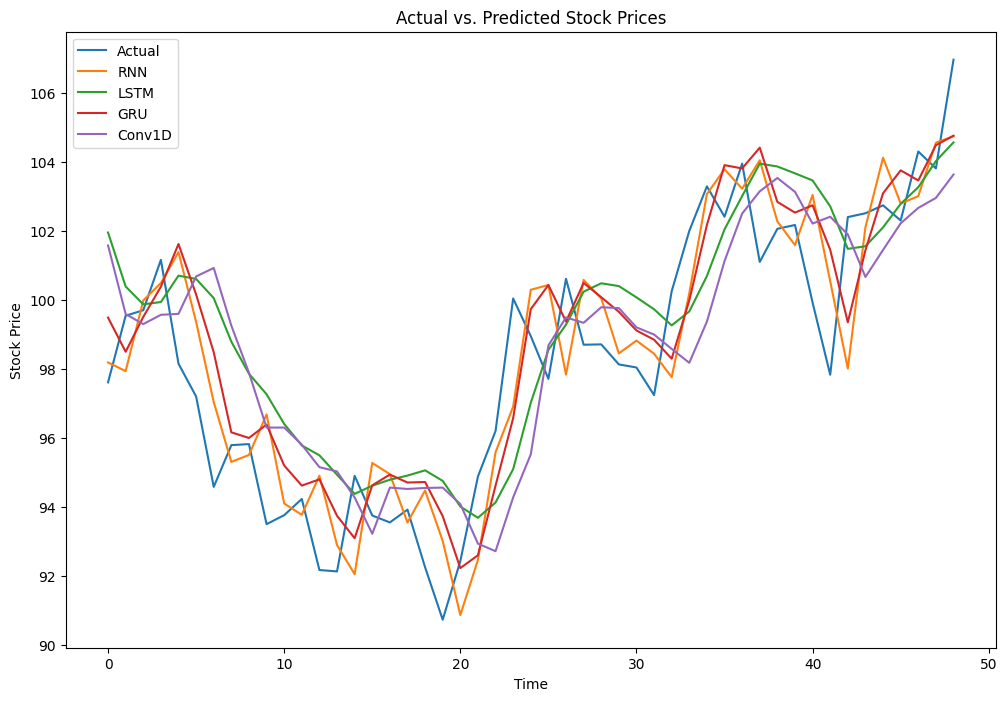

In [48]:
#Step 11: Plot the actual and predicted values

plt.figure(figsize=(12, 8))
plt.plot(y_test, label='Actual')
plt.plot(rnn_predictions, label='RNN')
plt.plot(lstm_predictions, label='LSTM')
plt.plot(gru_predictions, label='GRU')
plt.plot(conv1d_predictions, label='Conv1D')
plt.legend()
plt.title('Actual vs. Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.show()

In [49]:
#Step 12 Compare the MSE values and the visualizations

from sklearn.metrics import mean_squared_error

rnn_mse = mean_squared_error(y_test, rnn_predictions)
lstm_mse = mean_squared_error(y_test, lstm_predictions)
gru_mse = mean_squared_error(y_test, gru_predictions)
conv1d_mse = mean_squared_error(y_test, conv1d_predictions)

print(f"RNN MSE: {rnn_mse}")
print(f"LSTM MSE: {lstm_mse}")
print(f"GRU MSE: {gru_mse}")
print(f"Conv1D MSE: {conv1d_mse}")

RNN MSE: 3.5882692222105277
LSTM MSE: 5.830196825747437
GRU MSE: 3.8052813535154675
Conv1D MSE: 6.315846379661644


#Based on the Mean Squared Error (MSE) values, the RNN model seems to perform the best, followed by the GRU model. The LSTM and Conv1D models have higher MSE values, indicating poorer performance.



#To further evaluate the performance of each model, we can plot the actual and predicted values of the test set. Looking at the plot, we can see that the RNN and GRU models seem to have the closest fit to the actual values, while the LSTM and Conv1D models have more variability in their predictions.



#Overall, while the RNN and GRU models seem to have performed the best in terms of both MSE values and visualizations, it's important to note that performance can vary depending on the specific dataset and task at hand, so it's always a good idea to evaluate multiple models and choose the one that performs the best for the specific task.
